<a href="https://colab.research.google.com/github/Series-Parallel/the_one_AND_only_Iris_dataset/blob/main/Basic_ML_with_IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## removing unneeded column

In [5]:
iris.drop("Id", axis=1, inplace = True)

# Some EDA (Exploratory Data Analysis) with Iris

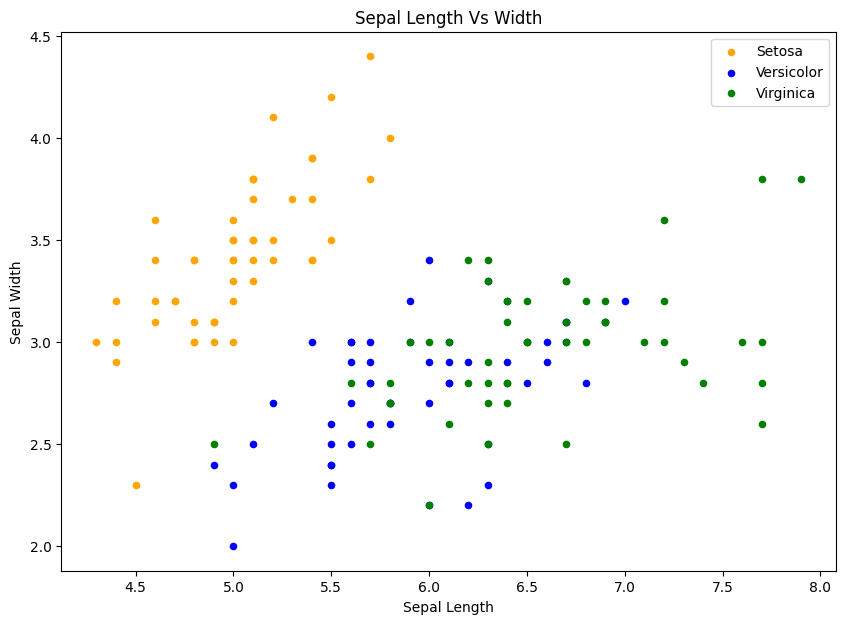

In [6]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

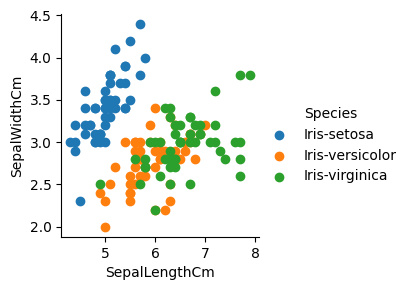

In [14]:
sns.FacetGrid(iris, hue='Species')\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()


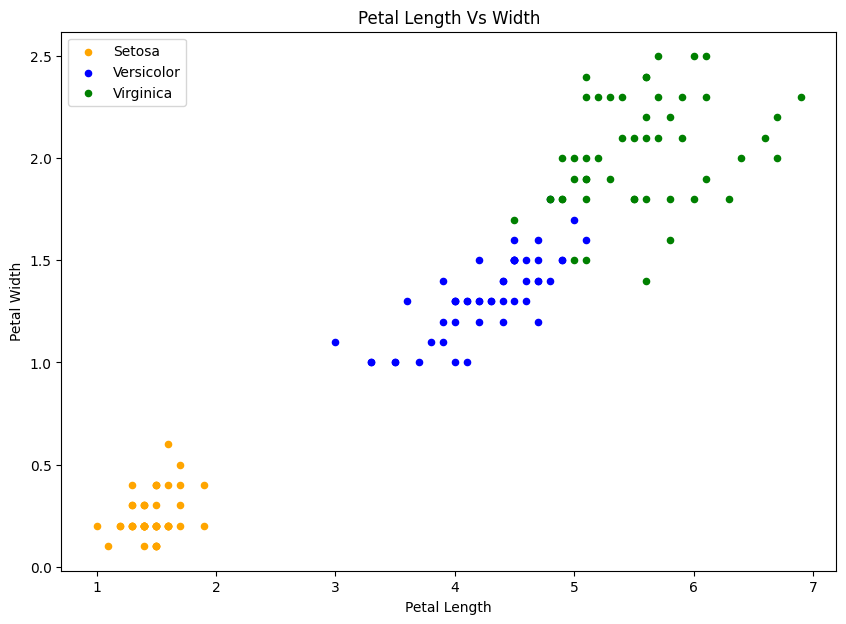

In [15]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

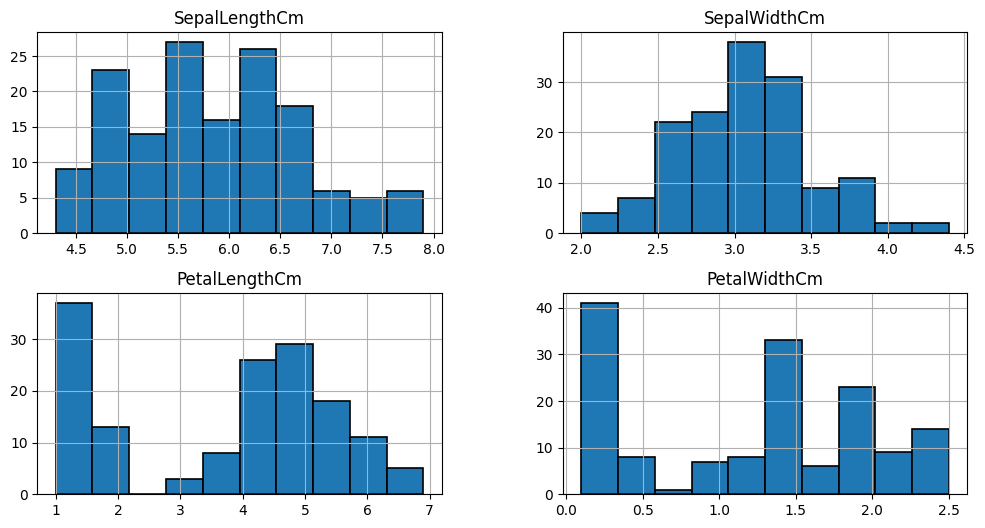

In [16]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

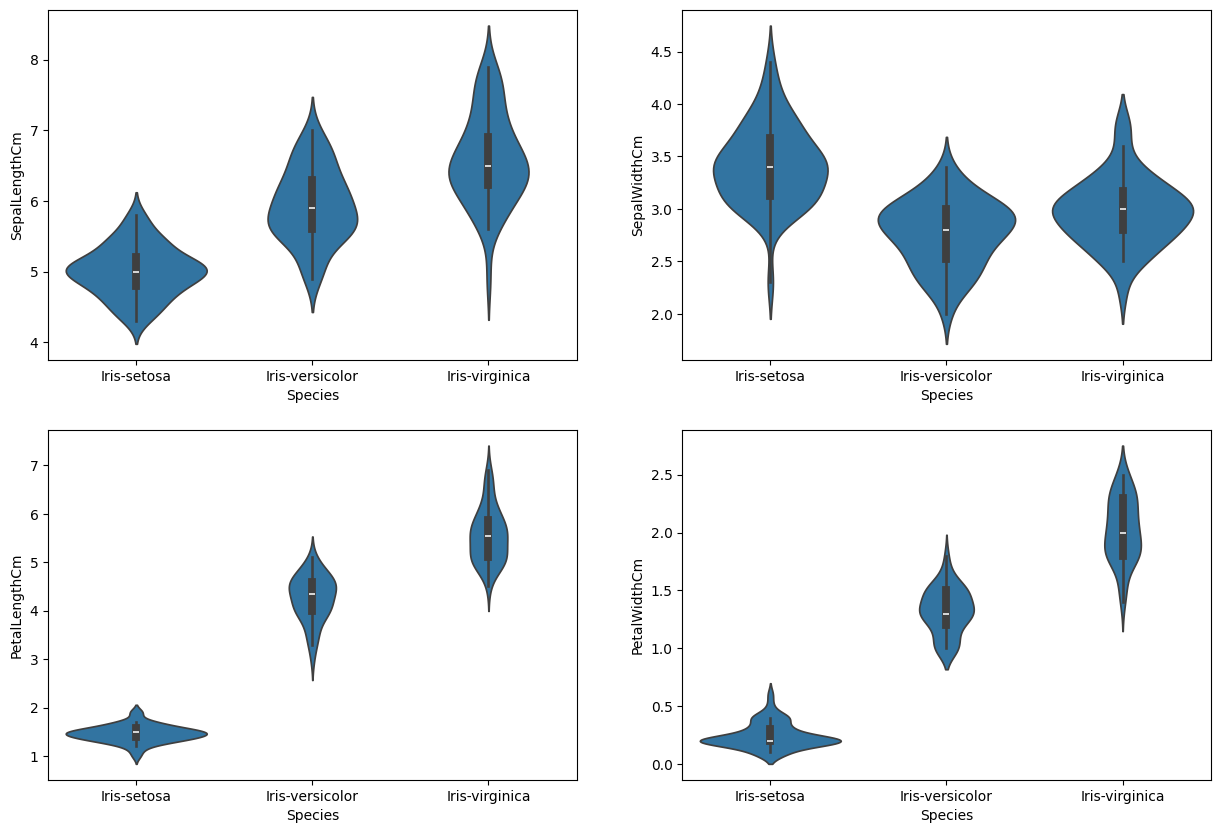

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

# Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
## Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data
## Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
Before we start, we need to clear some ML notations.
attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.
Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [19]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [20]:
iris.shape

(150, 5)

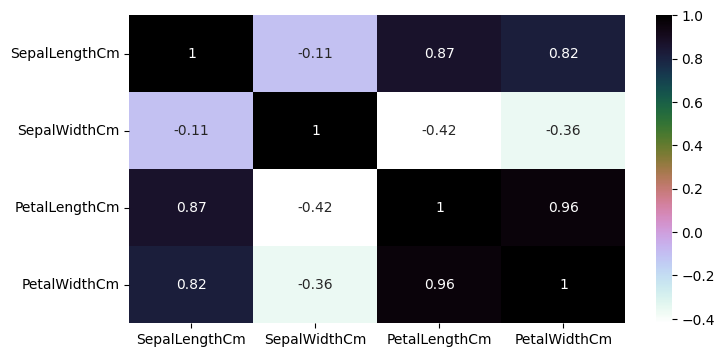

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.drop('Species', axis=1).corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

Observation---> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

# Splitting the dataset into Trainging and Testing Dataset

In [23]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [24]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [25]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
69,5.6,2.5,3.9,1.1
38,4.4,3.0,1.3,0.2
138,6.0,3.0,4.8,1.8
143,6.8,3.2,5.9,2.3
49,5.0,3.3,1.4,0.2


In [26]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
135,7.7,3.0,6.1,2.3
18,5.7,3.8,1.7,0.3
93,5.0,2.3,3.3,1.0
26,5.0,3.4,1.6,0.4
74,6.4,2.9,4.3,1.3


In [27]:
train_y.head()

,Species
69,Iris-versicolor
38,Iris-setosa
138,Iris-virginica
143,Iris-virginica
49,Iris-setosa


In [28]:
test_y.head()

,Species
135,Iris-virginica
18,Iris-setosa
93,Iris-versicolor
26,Iris-setosa
74,Iris-versicolor


#SVM Support Vector Machines

In [29]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

# Logistic Regression

In [30]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


# Decision Tree

In [31]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9555555555555556


# K-Nearest Neighbors

In [32]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


## Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x7be4f3882d50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

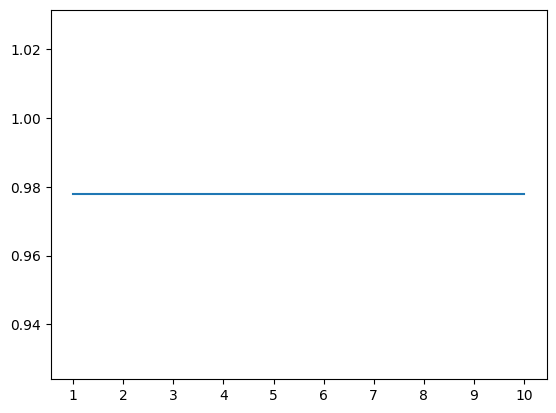

In [34]:
a_index = list(range(1,11))
a = [] # Initialize a as a list
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a.append(metrics.accuracy_score(prediction, test_y)) # Append accuracy to the list
a = pd.Series(a, index=a_index) # Convert the list to a Series after the loop
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

## Creating Petals And Sepals Training Data

In [35]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

## For Iris Petal

In [36]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

## For Iris Sepal

In [37]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

# SVM Algorithm

In [38]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


## Logistice **Regression**

In [39]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


## Decision Tree

In [40]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


## K-Nearest Neighbors

In [41]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


#Observations:


*   Using Petals over Sepal for training the data gives a much better accuracy.
*   This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

